***Data Cleaning ***

*ORIGINAL DATASET* :-Vito, S. (2008). Air Quality [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C59K5F.

In [1]:
install.packages("psych")
install.packages("imputeTS")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘litedown’, ‘xts’, ‘TTR’, ‘markdown’, ‘png’, ‘jpeg’, ‘quadprog’, ‘quantmod’, ‘gridtext’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘ggtext’, ‘stinepack’, ‘forecast’




In [ ]:
library(dplyr)  # For data manipulation
library(readr)  # For reading CSV files
library(ggplot2)  # For visualization 
library(tidyverse)
library(psych)
library(imputeTS)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
# Read the CSV file (update with correct path)

df <- readxl::read_excel("AirQualityUCI.xlsx")

df <- df[, !(names(df) %in% c("X", "X.1"))]

In [4]:
# Check if the update was successful
str(df)

tibble [9,357 × 15] (S3: tbl_df/tbl/data.frame)
 $ Date         : POSIXct[1:9357], format: "2004-03-10" "2004-03-10" ...
 $ Time         : POSIXct[1:9357], format: "1899-12-31 18:00:00" "1899-12-31 19:00:00" ...
 $ CO(GT)       : num [1:9357] 2.6 2 2.2 2.2 1.6 1.2 1.2 1 0.9 0.6 ...
 $ PT08.S1(CO)  : num [1:9357] 1360 1292 1402 1376 1272 ...
 $ NMHC(GT)     : num [1:9357] 150 112 88 80 51 38 31 31 24 19 ...
 $ C6H6(GT)     : num [1:9357] 11.88 9.4 9 9.23 6.52 ...
 $ PT08.S2(NMHC): num [1:9357] 1046 955 939 948 836 ...
 $ NOx(GT)      : num [1:9357] 166 103 131 172 131 89 62 62 45 -200 ...
 $ PT08.S3(NOx) : num [1:9357] 1056 1174 1140 1092 1205 ...
 $ NO2(GT)      : num [1:9357] 113 92 114 122 116 96 77 76 60 -200 ...
 $ PT08.S4(NO2) : num [1:9357] 1692 1559 1554 1584 1490 ...
 $ PT08.S5(O3)  : num [1:9357] 1268 972 1074 1203 1110 ...
 $ T            : num [1:9357] 13.6 13.3 11.9 11 11.2 ...
 $ RH           : num [1:9357] 48.9 47.7 54 60 59.6 ...
 $ AH           : num [1:9357] 0.758 0.72

In [5]:
# Function to clean column names
clean_col_names <- function(col_names) {
  col_names <- gsub("\\.$", "", col_names)  # Remove trailing dots
  col_names <- gsub("\\.", "_", col_names)  # Replace middle dots with underscores
  return(col_names)
}

# Apply function to column names
colnames(df) <- clean_col_names(colnames(df))

# Check updated column names
print(colnames(df))

head(df)

 [1] "Date"          "Time"          "CO(GT)"        "PT08_S1(CO)"  
 [5] "NMHC(GT)"      "C6H6(GT)"      "PT08_S2(NMHC)" "NOx(GT)"      
 [9] "PT08_S3(NOx)"  "NO2(GT)"       "PT08_S4(NO2)"  "PT08_S5(O3)"  
[13] "T"             "RH"            "AH"           


Date,Time,CO(GT),PT08_S1(CO),NMHC(GT),C6H6(GT),PT08_S2(NMHC),NOx(GT),PT08_S3(NOx),NO2(GT),PT08_S4(NO2),PT08_S5(O3),T,RH,AH
<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2004-03-10,1899-12-31 18:00:00,2.6,1360.00,150,11.881723,1045.50,166,1056.25,113,1692.00,1267.50,13.600,48.875,0.7577538
2004-03-10,1899-12-31 19:00:00,2.0,1292.25,112,9.397165,954.75,103,1173.75,92,1558.75,972.25,13.300,47.700,0.7254874
2004-03-10,1899-12-31 20:00:00,2.2,1402.00,88,8.997817,939.25,131,1140.00,114,1554.50,1074.00,11.900,53.975,0.7502391
2004-03-10,1899-12-31 21:00:00,2.2,1375.50,80,9.228796,948.25,172,1092.00,122,1583.75,1203.25,11.000,60.000,0.7867125
2004-03-10,1899-12-31 22:00:00,1.6,1272.25,51,6.518224,835.50,131,1205.00,116,1490.00,1110.00,11.150,59.575,0.7887942
2004-03-10,1899-12-31 23:00:00,1.2,1197.00,38,4.741012,750.25,89,1336.50,96,1393.00,949.25,11.175,59.175,0.7847717


In [6]:
# Define a function to replace values
replaceValues <- function(df, value1, value2) {
  df[df == value1] <- value2  # Replace all occurrences of value1 with value2
  return(df)
}

# Copy original dataframe
df2 <- df

# Replace -200 with NA (null values)
df <- replaceValues(df2, -200, NA)

In [ ]:
# Function to print missing value counts with column names
print_missing_counts <- function(data) {
  missing_counts <- colSums(is.na(data))

  # Print column name and count on the same line
  for (i in seq_along(missing_counts)) {
    cat(sprintf("%s: %d ", names(missing_counts)[i], missing_counts[i]), "\n")
  }
}

print_missing_counts(df)  

Date: 0  
Time: 0  
CO(GT): 1683  
PT08_S1(CO): 366  
NMHC(GT): 8443  
C6H6(GT): 366  
PT08_S2(NMHC): 366  
NOx(GT): 1639  
PT08_S3(NOx): 366  
NO2(GT): 1642  
PT08_S4(NO2): 366  
PT08_S5(O3): 366  
T: 366  
RH: 366  
AH: 366  


In [8]:
# Column NMHC_GT has 8443 missing values, so we can drop that column
df <- df[, !(names(df) %in% c("NMHC(GT)"))]

In [9]:
describe(df)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Date,1,9357,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
Time,2,9357,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
CO(GT),3,7674,2.15275,1.4532520,1.8000000,1.970586,1.1860800,0.1000000,11.900000,11.800000,1.36921735,2.66378335,0.016589376
PT08_S1(CO),4,8991,1099.70786,217.0845706,1063.0000000,1082.075050,210.1585500,647.2500000,2039.750000,1392.500000,0.75568085,0.33329121,2.289417289
C6H6(GT),5,8991,10.08299,7.4496399,8.2398514,9.111130,6.5438919,0.1490477,63.741476,63.592429,1.36102621,2.48508411,0.078565392
PT08_S2(NMHC),6,8991,939.02921,266.8290003,909.0000000,923.106180,278.7288000,383.2500000,2214.000000,1830.750000,0.56142414,0.06212149,2.814031990
NOx(GT),7,7718,246.88125,212.9712238,179.8000000,211.238731,148.4082600,2.0000000,1479.000000,1477.000000,1.71517474,3.39781304,2.424200516
PT08_S3(NOx),8,8991,835.37097,256.8151061,805.5000000,814.562850,229.4323500,322.0000000,2682.750000,2360.750000,1.10134283,2.67404086,2.708423460
NO2(GT),9,7715,113.07552,48.3592501,109.0000000,110.162174,47.4432000,2.0000000,339.700000,337.700000,0.62116610,0.46210832,0.550568795


In [ ]:
df$Time <- sub("1899-12-31 ", "", df$Time)
df$Time <- sub("1899-12-31", "00:00:00", df$Time)

# Replace NA values with "00:00:00"
df$Time[is.na(df$Time)] <- "00:00:00"

# Also replace any empty strings with "00:00:00"
df$Time[df$Time == ""] <- "00:00:00"

df

Date,Time,CO(GT),PT08_S1(CO),C6H6(GT),PT08_S2(NMHC),NOx(GT),PT08_S3(NOx),NO2(GT),PT08_S4(NO2),PT08_S5(O3),T,RH,AH
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166,1056.25,113,1692.00,1267.50,13.600,48.875,0.7577538
2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103,1173.75,92,1558.75,972.25,13.300,47.700,0.7254874
2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131,1140.00,114,1554.50,1074.00,11.900,53.975,0.7502391
2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172,1092.00,122,1583.75,1203.25,11.000,60.000,0.7867125
2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131,1205.00,116,1490.00,1110.00,11.150,59.575,0.7887942
2004-03-10,23:00:00,1.2,1197.00,4.741012,750.25,89,1336.50,96,1393.00,949.25,11.175,59.175,0.7847717
2004-03-11,00:00:00,1.2,1185.00,3.624399,689.50,62,1461.75,77,1332.75,732.50,11.325,56.775,0.7603119
2004-03-11,01:00:00,1.0,1136.25,3.326677,672.00,62,1453.25,76,1332.75,729.50,10.675,60.000,0.7702385
2004-03-11,02:00:00,0.9,1094.00,2.339416,608.50,45,1579.00,60,1276.00,619.50,10.650,59.675,0.7648187


In [11]:
print_missing_counts(df)
head(df)

Date: 0  
Time: 0  
CO(GT): 1683  
PT08_S1(CO): 366  
C6H6(GT): 366  
PT08_S2(NMHC): 366  
NOx(GT): 1639  
PT08_S3(NOx): 366  
NO2(GT): 1642  
PT08_S4(NO2): 366  
PT08_S5(O3): 366  
T: 366  
RH: 366  
AH: 366  


Date,Time,CO(GT),PT08_S1(CO),C6H6(GT),PT08_S2(NMHC),NOx(GT),PT08_S3(NOx),NO2(GT),PT08_S4(NO2),PT08_S5(O3),T,RH,AH
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166,1056.25,113,1692.00,1267.50,13.600,48.875,0.7577538
2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103,1173.75,92,1558.75,972.25,13.300,47.700,0.7254874
2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131,1140.00,114,1554.50,1074.00,11.900,53.975,0.7502391
2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172,1092.00,122,1583.75,1203.25,11.000,60.000,0.7867125
2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131,1205.00,116,1490.00,1110.00,11.150,59.575,0.7887942
2004-03-10,23:00:00,1.2,1197.00,4.741012,750.25,89,1336.50,96,1393.00,949.25,11.175,59.175,0.7847717


In [12]:
write.csv(df, "AirQualityUCI_Missing_Values_Present_Time.csv", row.names = FALSE)

In [13]:
print_missing_counts(df)

Date: 0  
Time: 0  
CO(GT): 1683  
PT08_S1(CO): 366  
C6H6(GT): 366  
PT08_S2(NMHC): 366  
NOx(GT): 1639  
PT08_S3(NOx): 366  
NO2(GT): 1642  
PT08_S4(NO2): 366  
PT08_S5(O3): 366  
T: 366  
RH: 366  
AH: 366  


In [14]:
# Define file paths
input_file <- "AirQualityUCI_Missing_Values_Present_Time.csv"
output_file <- "AirQualityUCI_Interpolated.csv"

# Load the dataset
data <- read.csv(input_file, stringsAsFactors = FALSE)

In [15]:
# Function to clean column names
clean_col_names <- function(col_names) {
  col_names <- gsub("\\.$", "", col_names)  # Remove trailing dots
  col_names <- gsub("\\.", "_", col_names)  # Replace middle dots with underscores
  return(col_names)
}

# Apply function to column names
colnames(data) <- clean_col_names(colnames(data))

# Check for missing values
print_missing_counts(data)

# Apply interpolation for missing values (numeric columns only)
data_interp <- data %>%
  mutate(across(where(is.numeric), ~ na.interpolation(.)))


# Save the cleaned dataset
write.csv(data_interp, output_file, row.names = FALSE)

print(paste("Interpolated dataset saved at:", output_file))

Date: 0  
Time: 0  
CO_GT: 1683  
PT08_S1_CO: 366  
C6H6_GT: 366  
PT08_S2_NMHC: 366  
NOx_GT: 1639  
PT08_S3_NOx: 366  
NO2_GT: 1642  
PT08_S4_NO2: 366  
PT08_S5_O3: 366  
T: 366  
RH: 366  
AH: 366  


Warning message:
“There were 12 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(where(is.numeric), ~na.interpolation(.))`.
Caused by warning in `na.interpolation()`:
! na.interpolation will be replaced by na_interpolation.
           Functionality stays the same.
           The new function name better fits modern R code style guidelines.
           Please adjust your code accordingly.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 11 remaining warnings.”


[1] "Interpolated dataset saved at: AirQualityUCI_Interpolated.csv"


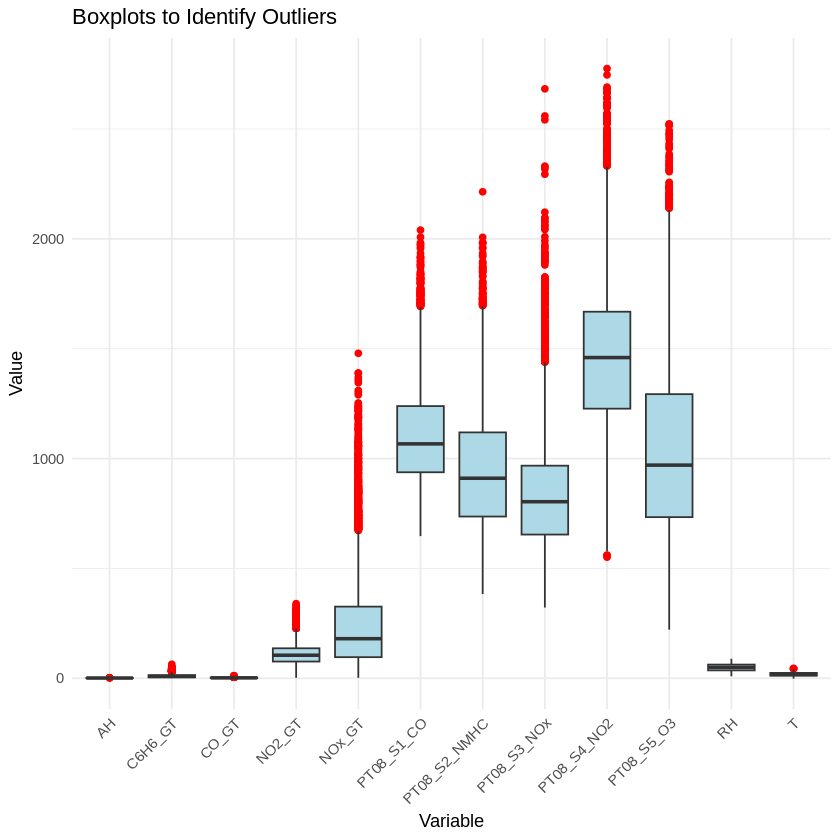

In [16]:
data <- read.csv("AirQualityUCI_Interpolated.csv", stringsAsFactors = FALSE)
# Select only numeric columns for outlier detection
numeric_data <- data %>% select(where(is.numeric))

# Reshape data for plotting (long format)
long_data <- pivot_longer(numeric_data, cols = everything(), names_to = "Variable", values_to = "Value")

# Create boxplots for each variable
ggplot(long_data, aes(x = Variable, y = Value)) +
  geom_boxplot(outlier.colour = "red", fill = "lightblue") +
  theme_minimal() +
  labs(title = "Boxplots to Identify Outliers", x = "Variable", y = "Value") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [17]:
dim(data)
remove_outliers_singlepass <- function(df) {
  outlier_mask <- rep(FALSE, nrow(df))  # Start with no rows flagged as outliers

  for (col in names(df)) {
    if (is.numeric(df[[col]])) {
      Q1 <- quantile(df[[col]], 0.25, na.rm = TRUE)
      Q3 <- quantile(df[[col]], 0.75, na.rm = TRUE)
      IQR <- Q3 - Q1
      lower <- Q1 - 1.5 * IQR
      upper <- Q3 + 1.5 * IQR

      # Flag rows that are outliers in this column
      col_outliers <- df[[col]] < lower | df[[col]] > upper
      outlier_mask <- outlier_mask | col_outliers  # combine with OR
    }
  }

  # Remove all rows with any outlier
  df_clean <- df[!outlier_mask, ]
  return(df_clean)
}

data_no_outliers <- remove_outliers_singlepass(data)
dim(data_no_outliers)

cat("Total Outliers Removed: ", nrow(data) - nrow(data_no_outliers))

# Save cleaned data
write.csv(data_no_outliers, "AirQualityUCI_No_Outliers_2.csv", row.names = FALSE)

cat(" Outliers removed successfully and file saved.\n")

[1] 9357   14

[1] 8415   14

Total Outliers Removed:  942 Outliers removed successfully and file saved.


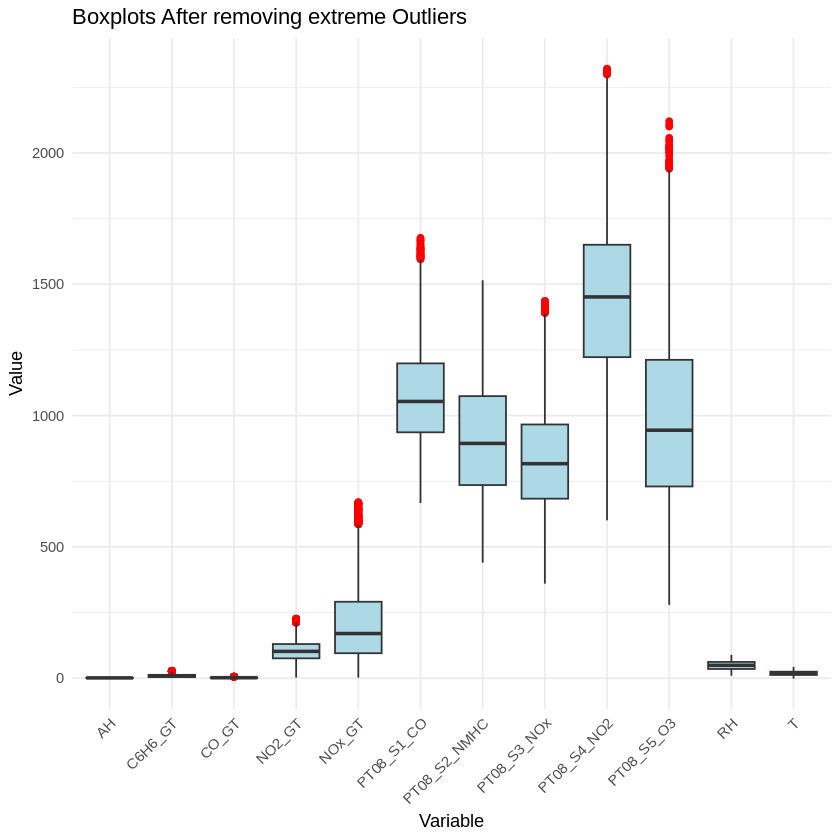

In [18]:
numeric_data <- data_no_outliers %>% select(where(is.numeric))

# Reshape data for plotting (long format)
long_data <- pivot_longer(numeric_data, cols = everything(), names_to = "Variable", values_to = "Value")

# Create boxplots for each variable
ggplot(long_data, aes(x = Variable, y = Value)) +
  geom_boxplot(outlier.colour = "red", fill = "lightblue") +
  theme_minimal() +
  labs(title = "Boxplots After removing extreme Outliers", x = "Variable", y = "Value") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [20]:
data_no_outliers <- read.csv("AirQualityUCI_No_Outliers_2.csv")
# Identify columns to exclude: Date, Time, and target (CO(GT))
exclude_cols <- c("Date", "Time", "CO_GT")

# Create a copy of data to hold the normalized version
data_normalized <- data_no_outliers

# Normalize only numeric predictor columns (excluding CO(GT))
cols_to_normalize <- setdiff(names(data_no_outliers), exclude_cols)

# Apply Z-score normalization
data_normalized[cols_to_normalize] <- data_no_outliers %>%
  select(all_of(cols_to_normalize)) %>%
  mutate(across(where(is.numeric), scale))

# Save the normalized dataset
write.csv(data_normalized, "AirQualityUCI_Normalized_CO_Target.csv", row.names = FALSE)

cat(" Dataset normalized (features only) with CO(GT) as target. Saved successfully.\n")

 Dataset normalized (features only) with CO(GT) as target. Saved successfully.
